#第3章　代表的な次元削減を行う10本ノック

## ノック21:PCAを実施してみよう

![](2022-09-11-07-08-15.png)

分散共分散行列　データがよくばらついている方向に合わせて空間の軸を取り直す

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.loc[df["target"] == 0, "target_name"] = "setosa"
df.loc[df["target"] == 1, "target_name"] = "versicolor"
df.loc[df["target"] == 2, "target_name"] = "virginica"
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


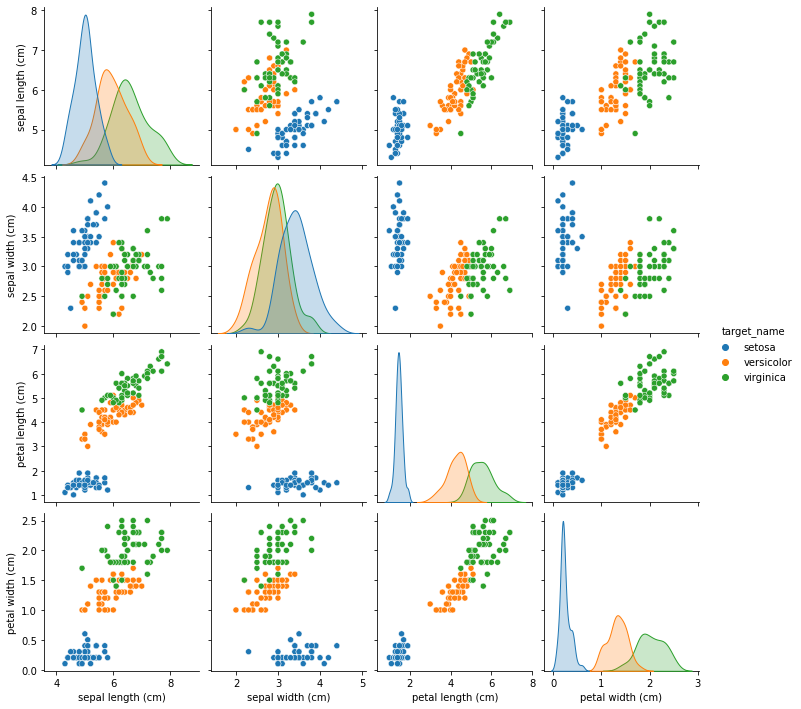

In [2]:
import seaborn as sns
sns.pairplot(df, vars=df.columns[:4], hue="target_name")


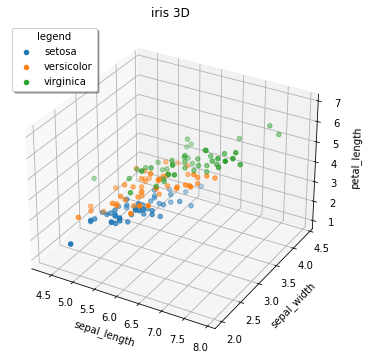

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection="3d")
for c in df["target_name"].unique():
    ax.scatter(df.iloc[:, 0][df["target_name"] == c], df.iloc[:, 1]
               [df["target_name"] == c], df.iloc[:, 2][df["target_name"] == c], label=c)
ax.set_title("iris 3D")
ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")
ax.legend(loc=2, title="legend", shadow=True)
plt.show()


In [4]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(random_state=0)
X_pc = pca.fit_transform(df.iloc[:, 0:4])
df_pca = pd.DataFrame(
    X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_)
print("保たれている情報: ", np.sum(pca.explained_variance_ratio_))
display(df_pca.head())


主成分の数:  4
保たれている情報:  1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

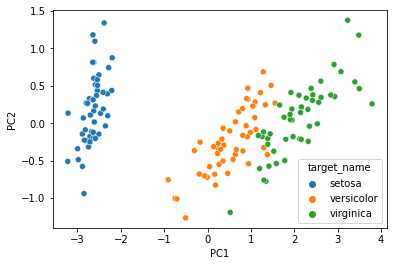

In [5]:
sns.scatterplot(x="PC1", y="PC2", data=df_pca, hue=df["target_name"])


## ノック22:主成分を解釈してみよう

![](2022-09-11-07-21-41.png)

![](2022-09-11-07-22-00.png)

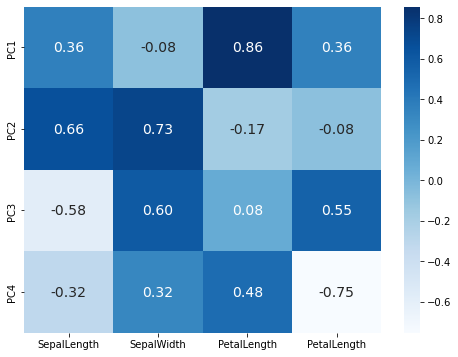

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.heatmap(pca.components_,
            cmap="Blues",
            annot=True,
            annot_kws={"size": 14},
            fmt=".2f",
            xticklabels=["SepalLength", "SepalWidth",
                         "PetalLength", "PetalLength"],
            yticklabels=["PC1", "PC2", "PC3", "PC4"],
            ax=ax)
plt.show()


## ノック23:スクリープロットで次元削減数を探索してみよう

In [7]:
df_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
#列名を追加
df_wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
                   "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
display(df_wine.shape)
display(df_wine.head())

(178, 14)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


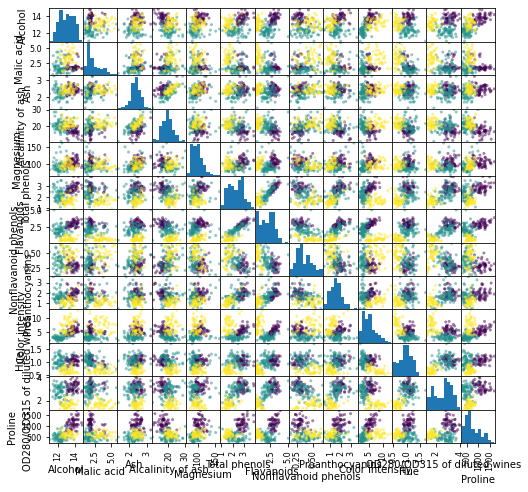

In [8]:
from pandas import plotting
plotting.scatter_matrix(df_wine.iloc[:,1:], figsize=(8,8), c=list(df_wine.iloc[:,0]),alpha=0.5)
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
sc=preprocessing.StandardScaler()
X=df_wine.iloc[:,1:]
X_norm=sc.fit_transform(X)

In [10]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
pca = PCA(random_state=0)
X_pc = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(
    X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_)
print("保たれている情報: ", round(np.sum(pca.explained_variance_ratio_), 2))
display(df_pca.head())


主成分の数:  13
保たれている情報:  1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


![](2022-09-17-06-36-25.png)

In [12]:
pd.DataFrame(np.round(pca.explained_variance_, 2), index=["PC{}".format(
    x + 1) for x in range(len(df_pca.columns))], columns=["固有値"])


,固有値
PC1,4.73
PC2,2.51
PC3,1.45
PC4,0.92
PC5,0.86
PC6,0.65
PC7,0.55
PC8,0.35
PC9,0.29
PC10,0.25


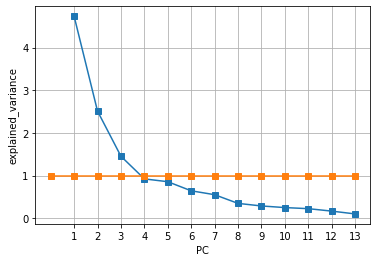

In [13]:
line=np.ones(14)
plt.plot(np.append(np.nan,pca.explained_variance_),"s-")
plt.plot(line,"s-")
plt.xlabel("PC")
plt.ylabel("explained_variance")
plt.xticks(np.arange(1, 14, 1))
plt.grid()
plt.show()

![](2022-09-17-06-41-48.png)

## ノック24:寄与率で次元削減数を探索してみよう

In [14]:
pd.DataFrame(np.round(pca.explained_variance_ratio_,2), index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))], columns=["寄与率"])

,寄与率
PC1,0.36
PC2,0.19
PC3,0.11
PC4,0.07
PC5,0.07
PC6,0.05
PC7,0.04
PC8,0.03
PC9,0.02
PC10,0.02


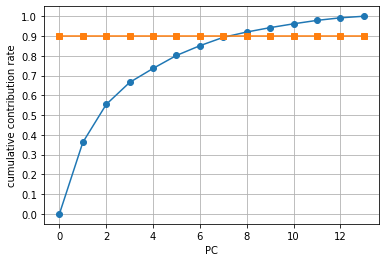

In [15]:
import matplotlib.ticker as ticker
line = np.full(14, 0.9)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("PC")
plt.ylabel("cumulative contribution rate")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(line, "s-")
plt.grid()
plt.show()

In [16]:
sc = preprocessing.StandardScaler()
X = df_wine.iloc[:, 1:]
X_norm = sc.fit_transform(X)

#n_componentsで累積寄与率を指定できる
pca = PCA(n_components=0.9, random_state=0)
X_pc = pca.fit_transform(X_norm)
df_pca = pd.DataFrame(
    X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_)
print("保たれている情報: ", round(np.sum(pca.explained_variance_ratio_), 2))
display(df_pca.head())


主成分の数:  8
保たれている情報:  0.92


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


## ノック25:Isomapで次元削減を実施してみよう

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'y')

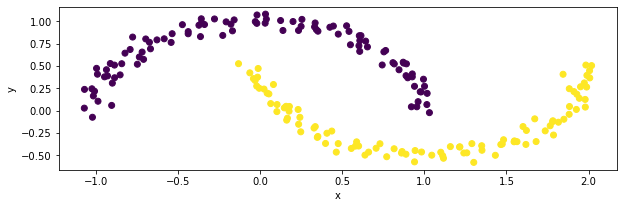

In [17]:
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, manifold
from sklearn import datasets
from sklearn.decomposition import PCA

X,Y=datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)
plt.figure(figsize=(10,3))
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x')
plt.ylabel('y')

In [18]:
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X_norm)

isomap_5=manifold.Isomap(n_neighbors=5, n_components=2)
X_isomap_5=isomap_5.fit_transform(X_norm)

isomap_10=manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap_10=isomap_10.fit_transform(X_norm)

![](2022-09-17-07-05-32.png)

<function matplotlib.pyplot.show(close=None, block=None)>

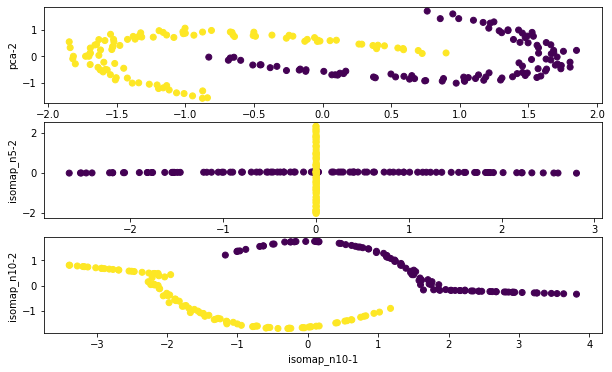

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.xlabel("pca-1")
plt.ylabel("pca-2")

plt.subplot(3, 1, 2)
plt.scatter(X_isomap_5[:, 0], X_isomap_5[:, 1], c=Y)
plt.xlabel("isomap_n5-1")
plt.ylabel("isomap_n5-2")

plt.subplot(3, 1, 3)
plt.scatter(X_isomap_10[:, 0], X_isomap_10[:, 1], c=Y)
plt.xlabel("isomap_n10-1")
plt.ylabel("isomap_n10-2")
plt.show

## ノック26:t-SNEで次元削減を実施してみよう

In [20]:
#t-SNEは2or3次元への圧縮へ特化したアルゴリズム
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


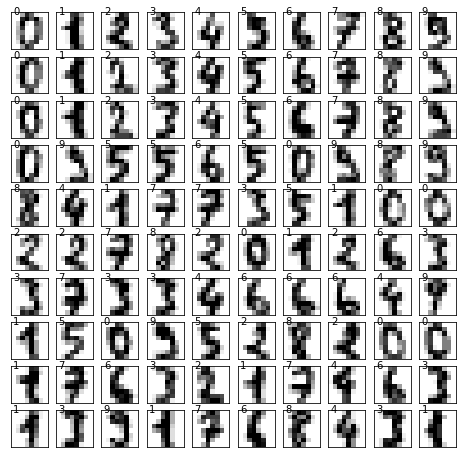

In [21]:
#先頭１００文字を表示
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={
                         "xticks": [], "yticks": []})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0, 0, str(digits.target[i]))


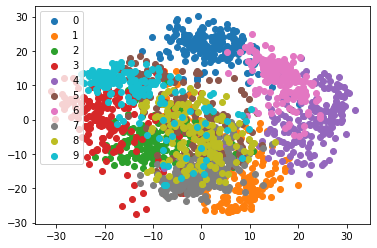

In [22]:
#PCAを実行して可視化
from sklearn.decomposition import PCA
X_reduced=PCA(n_components=2).fit_transform(digits.data)
for each_label in digits.target_names:
    c_plot_bool=digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool,0], X_reduced[c_plot_bool, 1], label='{}'.format(each_label))
    plt.legend()
plt.show()

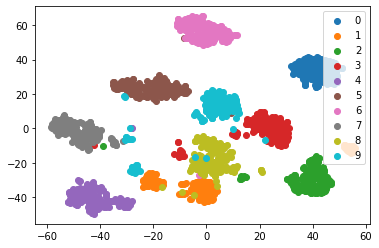

In [23]:
#t-SNEを実行して可視化
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2).fit_transform(digits.data)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0],
                X_reduced[c_plot_bool, 1], label='{}'.format(each_label))
    plt.legend()
plt.show()


![](2022-09-18-06-09-05.png)

## ノック27:t-SNEで最適なPerplexityを探索してみよう

In [24]:
#Preplexityはどれだけ近傍の点を考慮するかを決めるためのパラメーター　5〜50　デフォルトは30
import time


def create_2d_tsne(target_X, y, y_labels, perplexity_list=[2, 5, 30, 50, 100]):
    fig, axes = plt.subplots(nrows=1, ncols=len(
        perplexity_list), figsize=(5*len(perplexity_list), 4))
    for i, (ax, perplexity) in enumerate(zip(axes.flatten(), perplexity_list)):
        start_time = time.time()
        tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1],
                       label="{}".format(each_label))
        end_time = time.time()
        ax.legend()
        ax.set_title("perplexity: {}".format(perplexity))
        print("perplexity {} is {:.2f} seconds.".format(
            perplexity, end_time - start_time))
    plt.show()


perplexity 2 is 5.11 seconds.
perplexity 5 is 5.36 seconds.
perplexity 30 is 7.31 seconds.
perplexity 50 is 8.53 seconds.
perplexity 100 is 11.77 seconds.


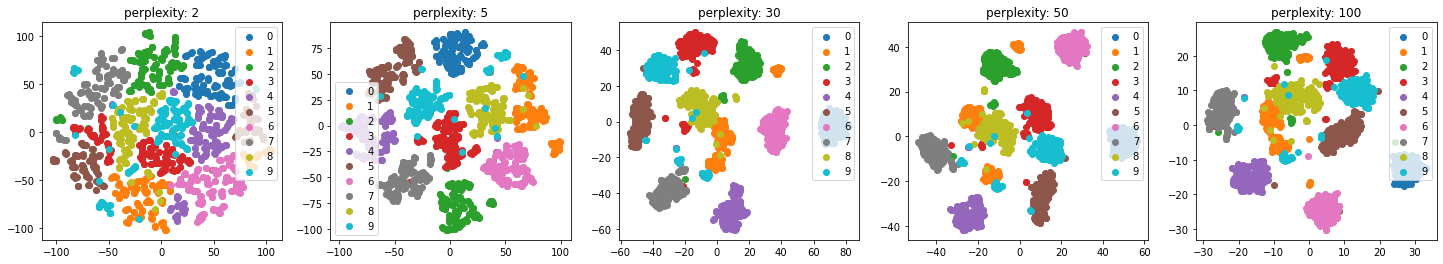

In [25]:
#2次元で可視化
create_2d_tsne(digits.data, digits.target, digits.target_names)

In [26]:
def create_3d_tsne(target_X, y, y_labels, perplexity_list=[2, 5, 30, 50, 100]):
    fig = plt.figure(figsize=(5*len(perplexity_list), 4))
    for i, perplexity in enumerate(perplexity_list):
        ax = fig.add_subplot(1, len(perplexity_list), i+1, projection="3d")
        start_time = time.time()
        tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1],
                       label="{}".format(each_label))
        end_time = time.time()
        ax.legend()
        ax.set_title("Perplexity: {}".format(perplexity))
        print("perplexity {} is {:.2f} seconds.".format(
            perplexity, end_time - start_time))
    plt.show()


perplexity 2 is 13.10 seconds.
perplexity 5 is 11.78 seconds.
perplexity 30 is 12.68 seconds.
perplexity 50 is 13.16 seconds.
perplexity 100 is 18.49 seconds.


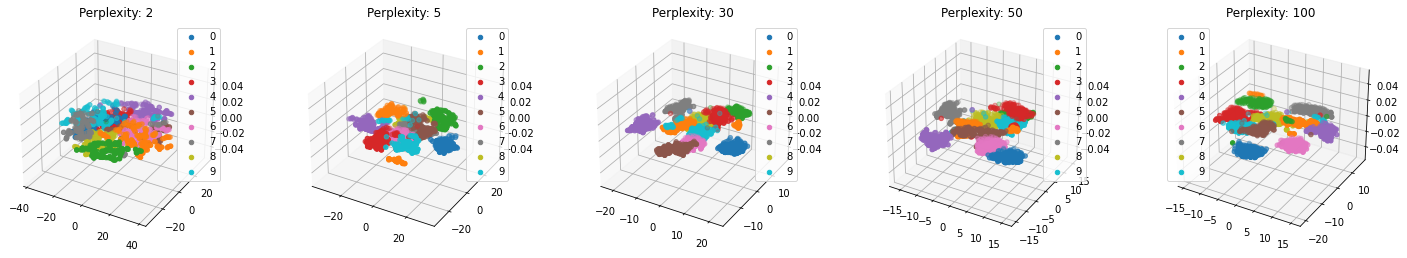

In [27]:
#3次元で可視化
create_3d_tsne(digits.data, digits.target, digits.target_names)

## ノック28:UMAPで次元削減を実施してみよう

![](2022-09-18-06-15-46.png)

In [28]:
import umap
 
start_time_tsne = time.time()
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)
interval_tsne = time.time() - start_time_tsne
 
start_time_umap = time.time()
embedding = umap.UMAP(n_components=2, random_state=0).fit_transform(digits.data)
interval_umap = time.time() - start_time_umap
 
print("tsne : {}s".format(np.round(interval_tsne,2)))
print("umap : {}s".format(np.round(interval_umap,2)))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


tsne : 7.22s
umap : 9.22s


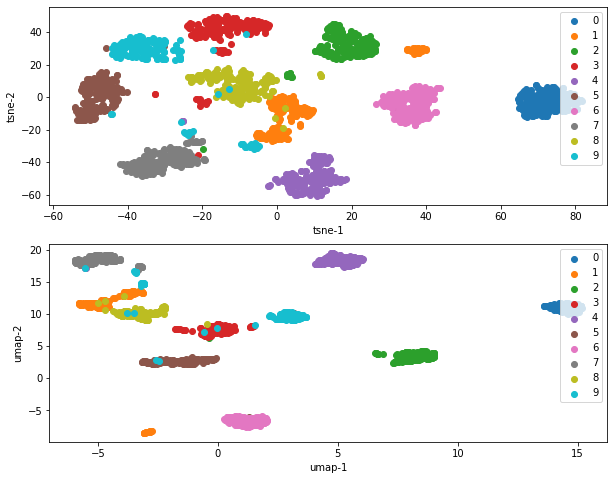

In [29]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0],
                X_reduced[c_plot_bool, 1], label="{}".format(each_label))
plt.legend(loc="upper right")
plt.xlabel("tsne-1")
plt.ylabel("tsne-2")

plt.subplot(2, 1, 2)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(embedding[c_plot_bool, 0],
                embedding[c_plot_bool, 1], label="{}".format(each_label))
plt.legend(loc="upper right")
plt.xlabel("umap-1")
plt.ylabel("umap-2")
plt.show()


## ノック29:UMAPで最適なn_neighborsを探索してみよう

![](2022-09-18-06-24-16.png)

In [30]:
def create_2d_umap(target_X, y, y_labels, n_neighbors_list=[2, 15, 30, 50, 100]):
    fig, axes = plt.subplots(nrows=1, ncols=len(
        n_neighbors_list), figsize=(5*len(n_neighbors_list), 4))
    for i, (ax, n_neighbors) in enumerate(zip(axes.flatten(), n_neighbors_list)):
        start_time = time.time()
        mapper = umap.UMAP(n_components=2, random_state=0,
                           n_neighbors=n_neighbors)
        Y = mapper.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1],
                       label="{}".format(each_label))
        end_time = time.time()
        ax.legend(loc="upper right")
        ax.set_title("n_neighbors: {}".format(n_neighbors))
        print("n_neighbors {} is {:.2f} seconds.".format(
            n_neighbors, end_time - start_time))
    plt.show()


/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


n_neighbors 2 is 18.51 seconds.
n_neighbors 15 is 5.10 seconds.
n_neighbors 30 is 6.19 seconds.
n_neighbors 50 is 6.25 seconds.
n_neighbors 100 is 7.35 seconds.


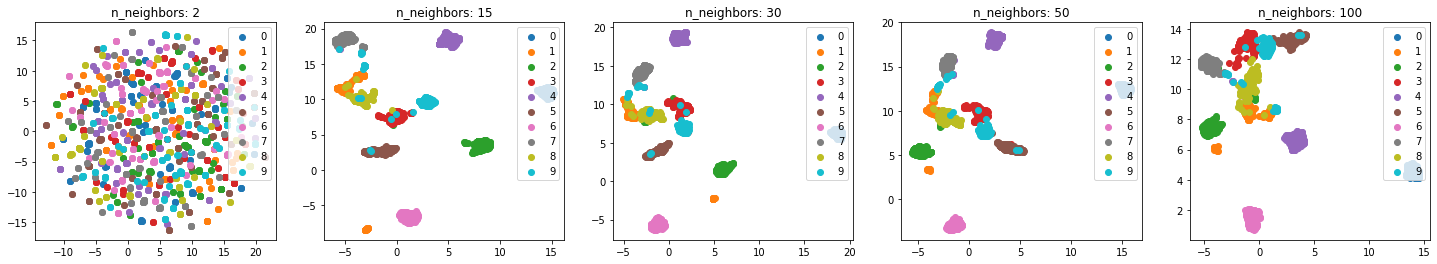

In [31]:
create_2d_umap(digits.data, digits.target, digits.target_names)

In [32]:
def create_3d_umap(target_X, y, y_labels, n_neighbors_list=[2, 15, 30, 50, 100]):
    fig = plt.figure(figsize=(5*len(n_neighbors_list), 4))
    for i, n_neighbors in enumerate(n_neighbors_list):
        ax = fig.add_subplot(1, len(n_neighbors_list), i+1, projection="3d")
        start_time = time.time()
        mapper = umap.UMAP(n_components=3, random_state=0,
                           n_neighbors=n_neighbors)
        Y = mapper.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1],
                       label="{}".format(each_label))
        end_time = time.time()
        ax.legend(loc="upper right")
        ax.set_title("n_neighbors_list: {}".format(n_neighbors))
        print("n_neighbors_list {} is {:.2f} seconds.".format(
            n_neighbors, end_time - start_time))
    plt.show()


n_neighbors_list 10 is 4.66 seconds.
n_neighbors_list 15 is 5.27 seconds.
n_neighbors_list 20 is 5.86 seconds.
n_neighbors_list 25 is 5.81 seconds.
n_neighbors_list 30 is 5.69 seconds.


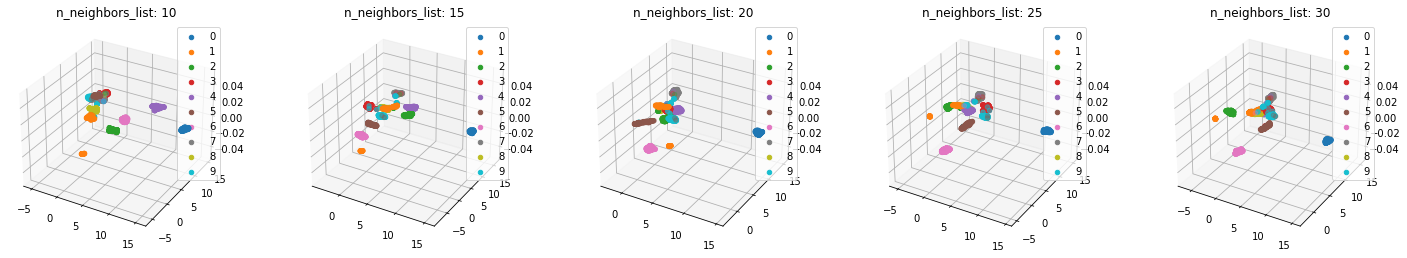

In [34]:
create_3d_umap(digits.data, digits.target,
               digits.target_names, [10, 15, 20, 25, 30])


## ノック30:PCAとUMAPを組み合わせて次元削減を実施してみよう

In [35]:
#PCAの結果をUMAPで次元削減するとより良い結果となる場合がある
pca = PCA(n_components=0.99, random_state=0)
X_pc = pca.fit_transform(digits.data)
df_pca = pd.DataFrame(
    X_pc, columns=["PC{}".format(i + 1) for i in range(len(X_pc[0]))])
print("主成分の数: ", pca.n_components_)
print("保たれている情報: ", np.sum(pca.explained_variance_ratio_))
display(df_pca.head())


主成分の数:  41
保たれている情報:  0.9901018242795547


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-0.755016,0.162842,-2.112977,1.094823,0.195686,-0.089994,-2.763741,1.088883,0.206004,1.704511
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,1.290907,-2.154407,0.166806,3.191428,-1.532268,-3.688113,2.073790,-0.230846,0.722354,-1.552377
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,0.450445,0.341085,-0.505617,-2.808245,-1.253872,-0.220568,0.038202,1.108652,3.285183,1.450043
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,2.086400,3.220693,-0.826725,-1.392380,2.075339,-1.291333,1.963138,1.893076,0.675706,-0.837613
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,0.405450,-0.079859,1.284010,1.015915,3.805724,0.627322,-0.159870,-2.986691,-0.397633,0.064666


n_neighbors 5 is 4.23 seconds.
n_neighbors 10 is 4.62 seconds.
n_neighbors 15 is 5.06 seconds.


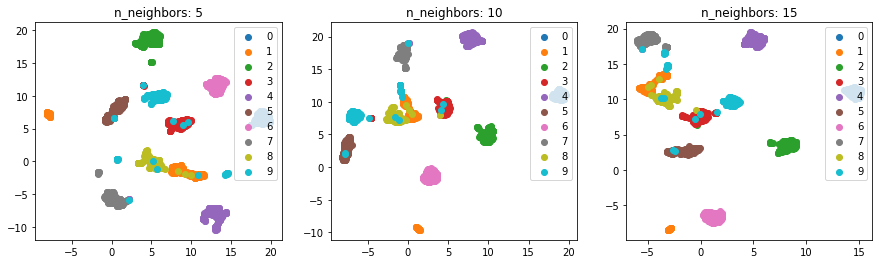

n_neighbors 5 is 3.98 seconds.
n_neighbors 10 is 4.55 seconds.
n_neighbors 15 is 4.78 seconds.


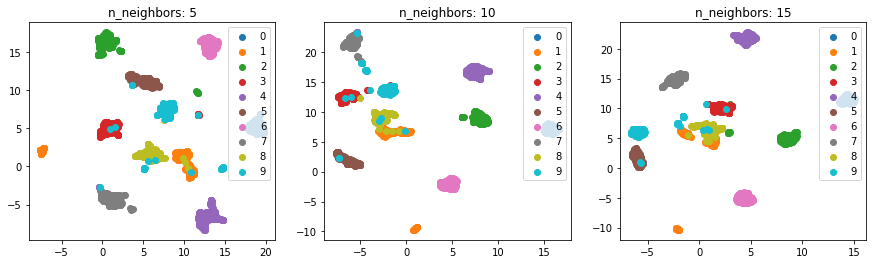

In [36]:
create_2d_umap(digits.data, digits.target, digits.target_names, [5,10,15])
create_2d_umap(df_pca, digits.target, digits.target_names, [5,10,15])